Output_shape (137, 6)
minmax
1.25
TRAINING DATA
Input shape (3230615, 7, 1)
Output_shape (3230615, 6)
TEST DATA
Input shape (137, 7, 1)
Output_shape (137, 6)
0 {'wape': 164.34554216192163, 'mase': 421.593}
1 {'wape': 70.8966734903892, 'mase': 127.579765}
2 {'wape': 58.042229987978665, 'mase': 178.66125}
3 {'wape': 57.56072217911363, 'mase': 173.45306}
4 {'wape': 4.902136368056994, 'mase': 5.7512}
5 {'wape': 153.3535324955669, 'mase': 345.5474}
6 {'wape': 3.5944417153939248, 'mase': 5.5545173}
7 {'wape': 73.9133891005774, 'mase': 96.79135}
8 {'wape': 45.86223637512569, 'mase': 62.10511}
9 {'wape': 46.19493157591936, 'mase': 42.773087}
10 {'wape': 59.74516915114728, 'mase': 221.88824}
11 {'wape': 9.44245509411908, 'mase': 12.424281}
12 {'wape': 4.609938810000232, 'mase': 4.2877383}
13 {'wape': 5.912540151250811, 'mase': 9.664728}
14 {'wape': 7.988965835824777, 'mase': 6.326959}
15 {'wape': 19.632751033001313, 'mase': 37.20094}
16 {'wape': 20.81523956020125, 'mase': 32.15362}
17 {'wape': 

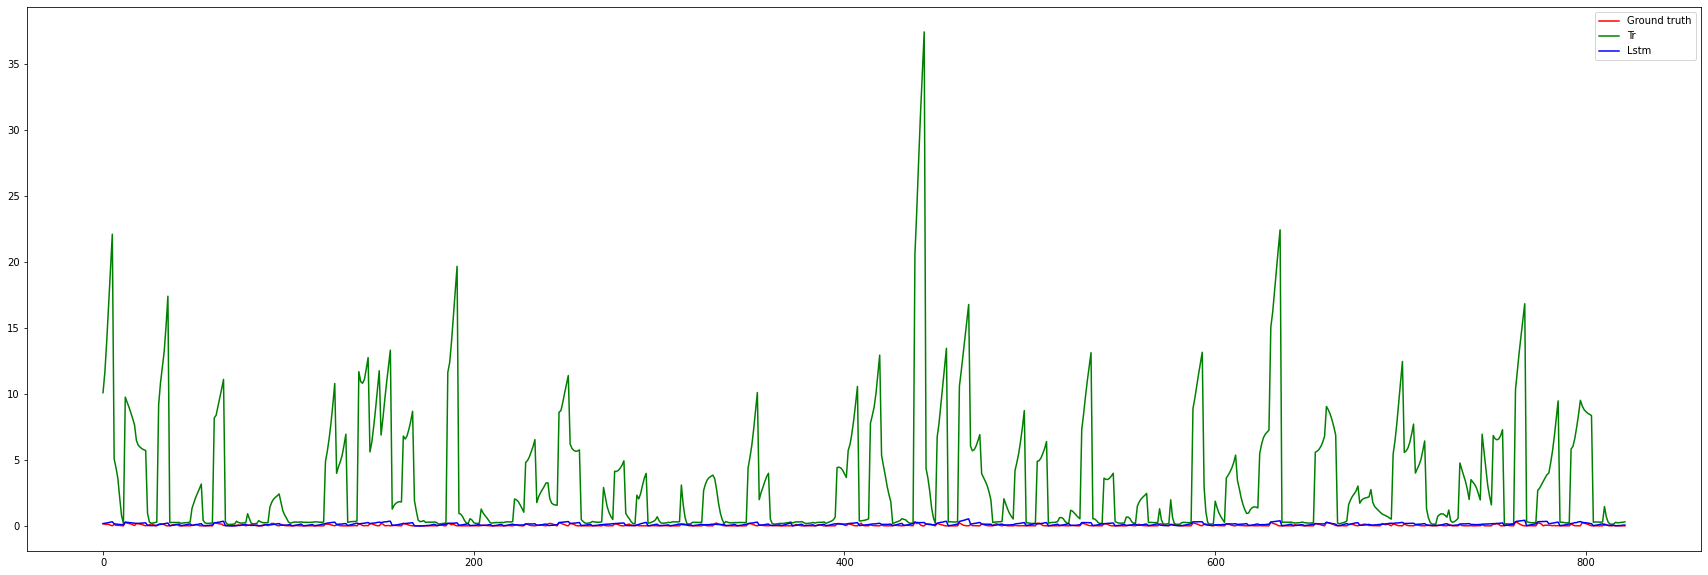

In [45]:
import numpy as np
import os
import json
from preprocessing import denormalize
import matplotlib.pyplot as plt
from metrics import METRICS, evaluate
def read_data(dataset_path, normalization_method, past_history_factor):
    # read normalization params
    norm_params = None
    with open(
        os.path.normpath(dataset_path)
        + "/{}/norm_params.json".format(normalization_method),
        "r",
    ) as read_file:
        norm_params = json.load(read_file)

    # read training / validation data
    tmp_data_path = os.path.normpath(dataset_path) + "/{}/{}/".format(
        normalization_method, past_history_factor
    )

    x_train = np.load(tmp_data_path + "x_train.np.npy")
    y_train = np.load(tmp_data_path + "y_train.np.npy")
    x_test = np.load(tmp_data_path + "x_test.np.npy")
    y_test = np.load(tmp_data_path + "y_test.np.npy")

    print("Output_shape", y_test.shape)

    if os.path.isfile(tmp_data_path + "invalidParams.np.npy"):
        invalidParams = np.load(tmp_data_path + "invalidParams.np.npy")
        norm_params = np.delete(norm_params,invalidParams)
        print(len(invalidParams))
    y_test_denorm = np.asarray(
        [
            denormalize(y_test[i], norm_params[i], normalization_method)
            for i in range(y_test.shape[0])
        ]
    )
    print(normalization_method)
    print(past_history_factor)
    print("TRAINING DATA")
    print("Input shape", x_train.shape)
    print("Output_shape", y_train.shape)
    print("TEST DATA")
    print("Input shape", x_test.shape)
    print("Output_shape", y_test.shape)

    return x_train, y_train, x_test, y_test, y_test_denorm, norm_params

dataset_path = "/usr/desarrollo/tsf/TimeSeriesForecasting-DeepLearning/data/SolarEnergy"

normalization_method = "minmax"
past_history_factor = 1.25
x_train, y_train, x_test, y_test, y_test_denorm, norm_params = read_data(
    dataset_path, normalization_method, past_history_factor)


y_predict_tr = np.load("/usr/desarrollo/tsf/TimeSeriesForecasting-DeepLearning/experiments_transformers/results/SolarEnergy/minmax/1.25/5/32/Noam/trDPT/Normalize0.npy")
y_predict_lstm = np.load("/usr/desarrollo/tsf/TimeSeriesForecasting-DeepLearning/experiments_transformers/results/SolarEnergy/minmax/1.25/5/32/0.001/lstm/Normalize0.npy")


for i in range(len(y_predict_tr)):
    test_metrics = evaluate(y_test[i].reshape((1,y_test_denorm[i].shape[0])), y_predict_tr[i].reshape((1,y_predict_tr[i].shape[0])),METRICS)
    print(i , test_metrics)
    #print(y_test_denorm[i])
    #print(y_predict_tr[i])
 


plt.figure(figsize=(30,10))
plt.plot(y_test.flatten(),'r',label='Ground truth')
plt.plot(y_predict_tr.flatten(),'g',label='Tr')
plt.plot(y_predict_lstm.flatten(),'b',label='Lstm')
plt.legend()
plt.savefig('denormalized.jpg')
plt.show()
